# **Read Data**

In [ ]:
a1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Space Titanic/train.csv")

In [ ]:
a1.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [ ]:
a1.shape

(8693, 14)

In [ ]:
a1.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [ ]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
a1["CryoSleep"]=a1["CryoSleep"].astype(str)

# **Missing Data Treatment**

In [ ]:
a1.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
a1["Name"]=a1["Name"].fillna("Undisclosed")

In [ ]:
def replacer(df):
  for i in df.columns:
    if df[i].dtypes=="object":
      x=list(df[i].mode())[0]
      df[i]=df[i].fillna(x)
    else:
      x=df[i].mean()
      df[i]=df[i].fillna(x)
  return df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [ ]:
replacer(a1)

# **Outlier Analysis**

In [ ]:
def outlier_analysis(df):
  cat=[]
  con=[]
  for i in df.columns:
    if df[i].dtypes=="object":
      cat.append(i)
    else:
      con.append(i)
  
  import pandas as pd
  from sklearn.preprocessing import StandardScaler
  ss=StandardScaler()
  A1=pd.DataFrame(ss.fit_transform(df[con]),columns=con)
  A2=pd.DataFrame(df[cat],columns=cat)

  OUT=pd.DataFrame(A1[(A1>3)].sum().sort_values(),columns=["OUT_VAL"])
  return OUT

,OUT_VAL
Transported,0.000000
Age,96.327240
ShoppingMall,725.946591
RoomService,912.430461
FoodCourt,947.161216
VRDeck,970.926634
Spa,980.108266
VIP,1300.117687


In [ ]:
outlier_analysis(a1)

### **We need to eliminate Outliers from;**

Age	96.327240

ShoppingMall	725.946591

RoomService	912.430461

FoodCourt	947.161216

VRDeck	970.926634

Spa	980.108266

VIP	1300.117687

# **Eliminating Outliers**

In [ ]:
def outliers_rem(df):
  cat=[]
  con=[]
  for i in df.columns:
    if df[i].dtypes=="object":
      cat.append(i)
    else:
      con.append(i)
  
  import pandas as pd
  from sklearn.preprocessing import StandardScaler
  ss=StandardScaler()
  A1=pd.DataFrame(ss.fit_transform(df[con]),columns=con)
  A2=pd.DataFrame(df[cat],columns=cat)

  OUT=pd.DataFrame(A1[(A1>3)].sum().sort_values(),columns=["OUT_VAL"])
  OUT_Fea=list(OUT[OUT["OUT_VAL"]>=2.9].index)

  A=A1.join(A2)

  for i in OUT_Fea:
    A=A[(A[i]<3)&(A[i]>-3)]
  
  A3=pd.DataFrame(ss.inverse_transform(A[con]),columns=con)
  A4=pd.DataFrame(A[cat],columns=cat)
  a=A3.join(A4)
  print("___________________________________________")
  print("Features with Outliers: ",OUT_Fea)
  print("___________________________________________")
  return a

In [ ]:
a=outliers_rem(a1)

___________________________________________
Features with Outliers:  ['Age', 'ShoppingMall', 'RoomService', 'FoodCourt', 'VRDeck', 'Spa', 'VIP']
___________________________________________


In [ ]:
a.shape

(7798, 14)

In [ ]:
a.index=range(0,7798)

In [ ]:
a1.shape

(8693, 14)

# **Univarite Analysis**

In [ ]:
U=a.drop(labels=["PassengerId","Cabin","Name"],axis=1)

In [ ]:
def UNI(df,fs):
  def catcon(df):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
      else:
        con.append(i)
    return cat,con
  cat,con=catcon(df)

  import pandas as pd
  import seaborn as sb
  import matplotlib.pyplot as plt
  plt.figure(figsize=fs)
  cols=3
  tot_rows=df.shape[1]
  rows=tot_rows//cols

  plt_no=1
  for i in con:
    plt.subplot(rows,cols,plt_no)
    sb.distplot(df[i])
    plt_no+=1
  plt_no=1
  for i in cat:
    plt.subplot(rows,cols,plt_no)
    q=sb.countplot(df[i])
    q.set_xticklabels(q.get_xticklabels(),rotation=21,horizontalalignment="right")
    plt_no+=1

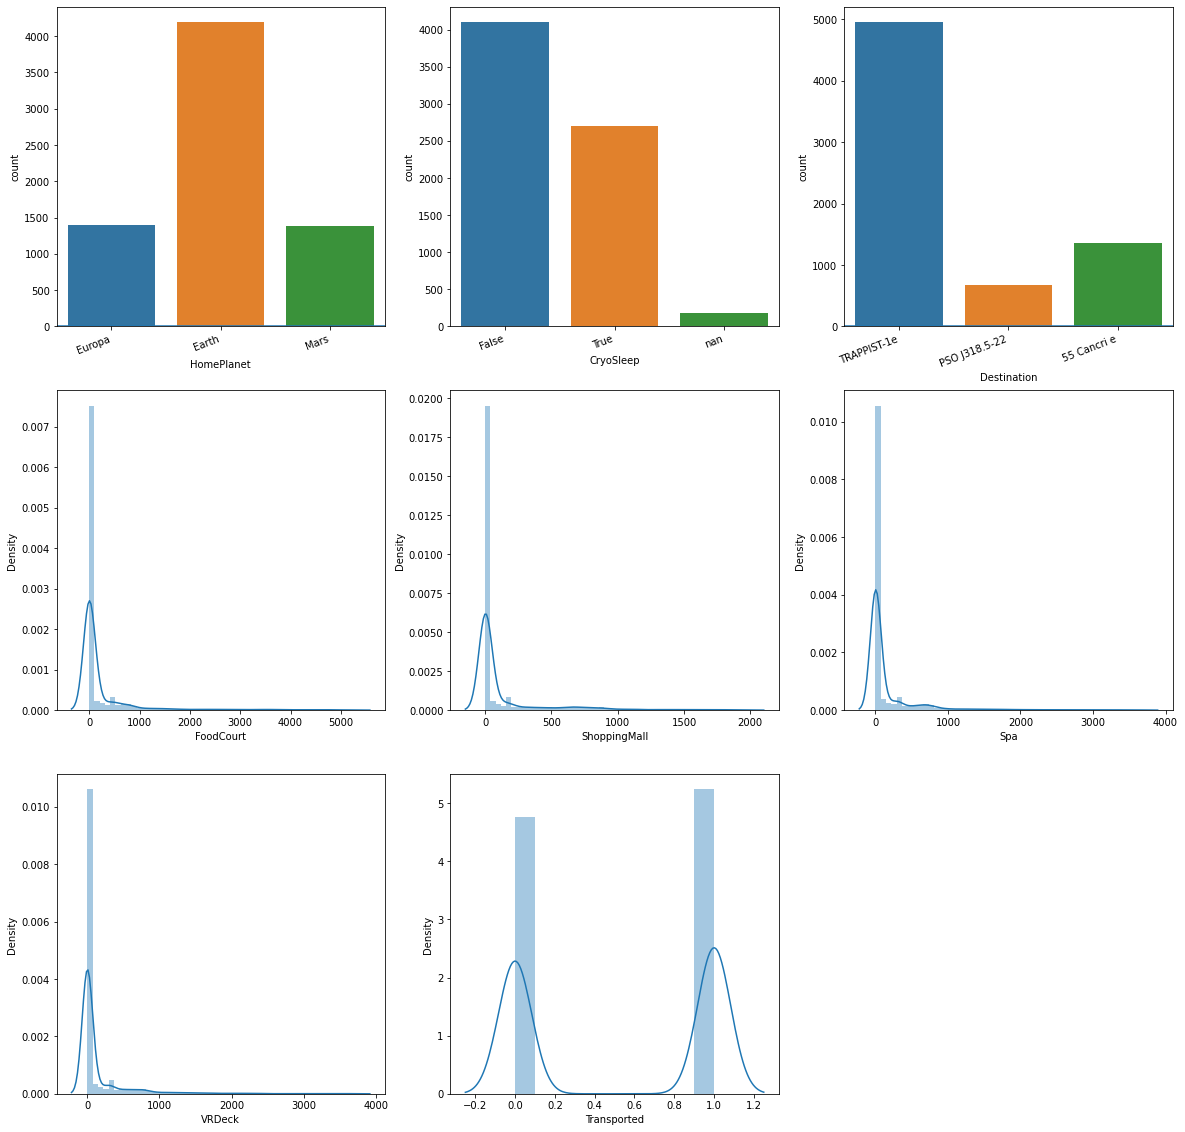

In [ ]:
UNI(U,(20,20))

# **Bivariate Analysis w.r.t. Transported**

In [ ]:
def BIV_H(df,fs,con_col):
  def catcon(df):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
      else:
        con.append(i)
    return cat,con
  cat,con=catcon(df)

  import pandas as pd
  import seaborn as sb
  import matplotlib.pyplot as plt
  plt.figure(figsize=fs)
  cols=3
  tot_rows=df.shape[1]
  rows=tot_rows//cols

  plt_no=1
  for i in con:
    plt.subplot(rows,cols,plt_no)
    sb.scatterplot(df[i],df[con_col])
    plt_no+=1
  plt_no=1
  for i in cat:
    plt.subplot(rows,cols,plt_no)
    q=sb.boxplot(df[i],df[con_col])
    q.set_xticklabels(q.get_xticklabels(),rotation=21,horizontalalignment="right")
    plt_no+=1

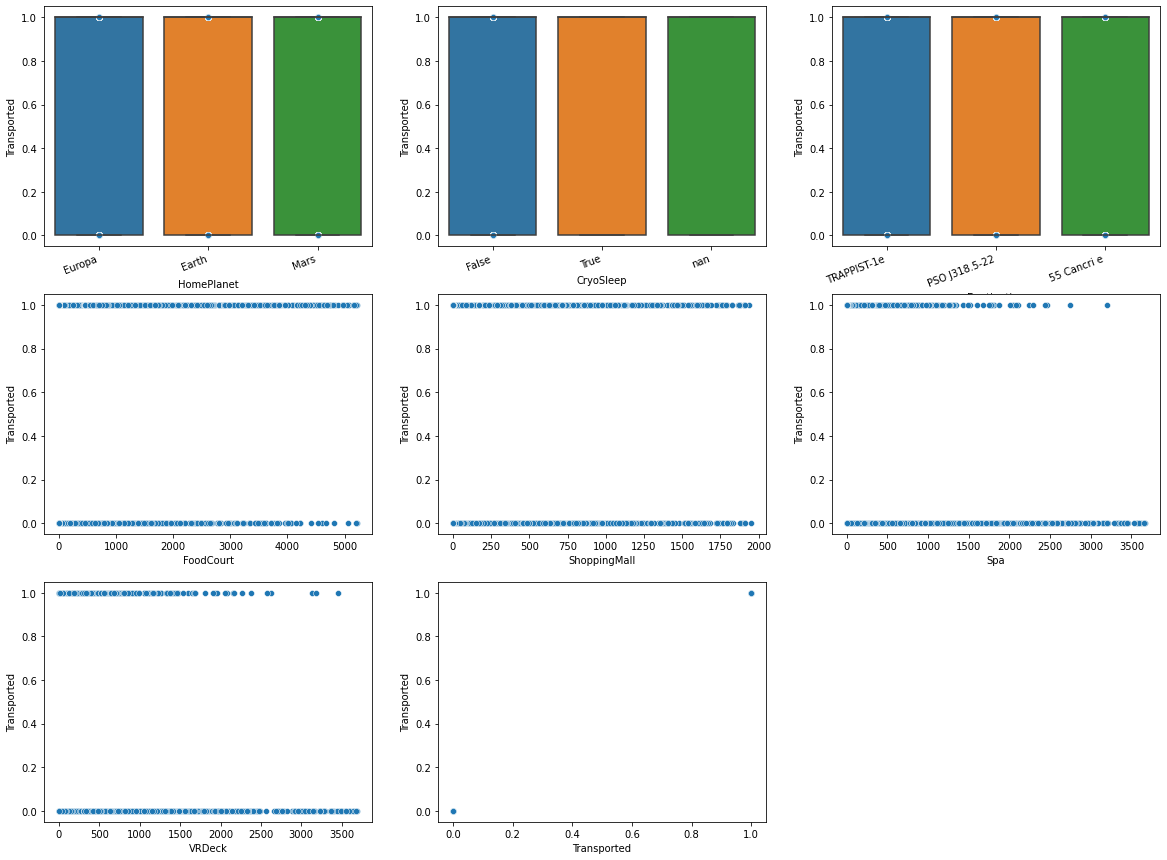

In [ ]:
BIV_H(U,(20,15),"Transported")

# **Heatmap**

In [ ]:
def HM(df,fs):
  import seaborn as sb
  import matplotlib.pyplot as plt
  plt.figure(figsize=fs)
  sb.heatmap(df.corr(),annot=True,cmap="coolwarm")

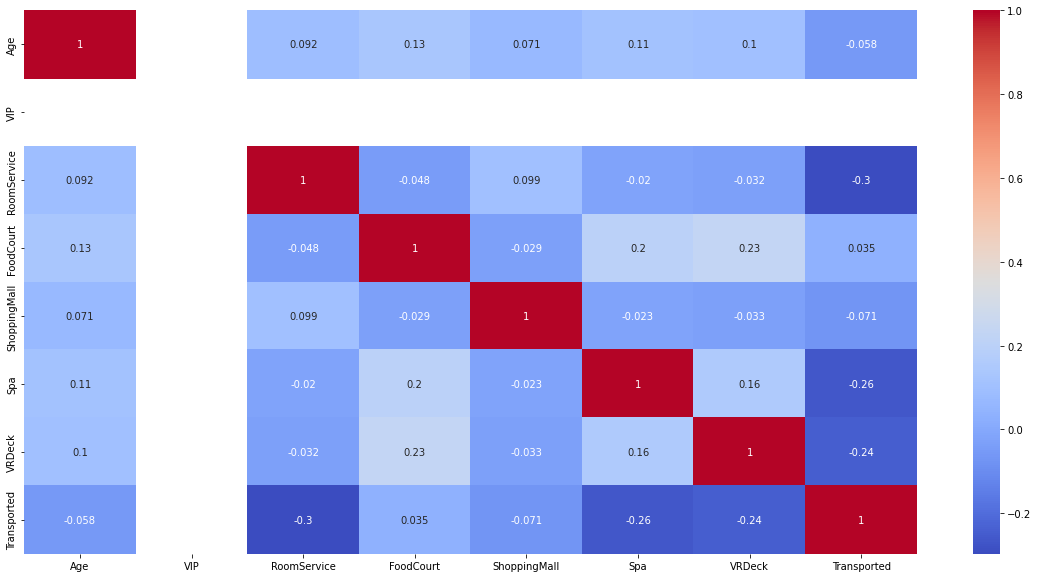

In [ ]:
HM(a,(20,10))

# **Continuous and Categorical columns**

In [ ]:
def catcon(df):
  cat=[]
  con=[]
  for i in df.columns:
    if df[i].dtypes=="object":
      cat.append(i)
    else:
      con.append(i)
  return cat,con

In [ ]:
cat,con=catcon(a)

In [ ]:
cat

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Name']

In [ ]:
con

['Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported']

# **ChiSquare Test**

In [ ]:
def CHI(df,cat_col):
  from scipy.stats import chi2_contingency
  import pandas as pd
  def catcon(df):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
      else:
        con.append(i)
    return cat,con
  cat,con=catcon(df)
  imp_cat=[]
  for i in cat:
    q=chi2_contingency(pd.crosstab(df[cat_col],df[i]))[1]
    if q < 0.035:
      imp_cat.append(i)
  for i in imp_cat:
    if cat_col in imp_cat:
      imp_cat.remove(cat_col)
    else:
      pass
  return imp_cat

In [ ]:
CHI(a,"Transported")

[]

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(a["Transported"],a["PassengerId"]))[1]

0.49437526805568843

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(a["Transported"],a["HomePlanet"]))[1]

0.6828661145154467

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(a["Transported"],a["CryoSleep"]))[1]

0.7580415150326497

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(a["Transported"],a["Cabin"]))[1]

0.315247996526829

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(a["Transported"],a["Destination"]))[1]

0.2289379228074287

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(a["Transported"],a["VIP"]))[1]

1.0

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(a["Transported"],a["Name"]))[1]

0.49219558952892617

# **Anova Test**

In [ ]:
def ANOVA_cat(df,cat_col):
  from statsmodels.formula.api import ols
  from statsmodels.stats.anova import anova_lm
  def catcon(df):
    cat=[]
    con=[]
    for i in df.columns:
      if df[i].dtypes=="object":
        cat.append(i)
      else:
        con.append(i)
    return cat,con
  cat,con=catcon(df)

  imp_con=[]
  for i in con:
    reg=i + "~" + cat_col
    model=ols(reg,df).fit()
    q=anova_lm(model)
    if q.iloc[0,4] < 0.04:
      imp_con.append(i)
  for i in imp_con:
    if cat_col in imp_con:
      imp_con.remove(cat_col)
    else:
      pass
  return imp_con

In [ ]:
imp_con=ANOVA_cat(a,"Transported")

In [ ]:
imp_con

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
imp_cat=["Destination","CryoSleep"]

# **Defining X and Y**

In [ ]:
X=a[imp_con+imp_cat]

In [ ]:
Y=a[["Transported"]]

# **Preprocessing**

In [ ]:
cat,con=catcon(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [ ]:
X2=pd.get_dummies(X[cat])

In [ ]:
Xnew=X1.join(X2)

In [ ]:
Xnew.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,CryoSleep_nan
0,0.768708,-0.425873,-0.344108,-0.405844,-0.364988,-0.360378,0,0,1,1,0,0
1,-0.285474,-0.125547,-0.331321,-0.322471,0.861668,-0.259397,0,0,1,1,0,0
2,0.347035,-0.425873,1.478751,0.831405,7.073146,0.082560,0,0,0,0,0,0


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# **Decision Tree MSplit**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="gini",random_state=31,min_samples_split=11)
model_dtc=dtc.fit(xtrain,ytrain)

pred_tr_dtc = model_dtc.predict(xtrain)
pred_ts_dtc = model_dtc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dtc = accuracy_score(ytrain,pred_tr_dtc)
ts_acc_dtc = accuracy_score(ytest,pred_ts_dtc)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_dtc)
print("Testing Accuracy: ",ts_acc_dtc)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.8594100673292722
Testing Accuracy:  0.7064102564102565
__________________________________________


### **Finding Best Parameters for DTC**

In [ ]:
tg={"criterion":["entropy","gini"],"min_samples_split":range(0,60)}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=31)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'criterion': 'gini', 'min_samples_split': 54}

**Msplit Model with best params**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="gini",random_state=31,min_samples_split=54)
model_dtc_ms=dtc.fit(xtrain,ytrain)

pred_tr_dtc_ms = model_dtc_ms.predict(xtrain)
pred_ts_dtc_ms = model_dtc_ms.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dtc_ms = accuracy_score(ytrain,pred_tr_dtc_ms)
ts_acc_dtc_ms = accuracy_score(ytest,pred_ts_dtc_ms)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_dtc_ms)
print("Testing Accuracy: ",ts_acc_dtc_ms)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.8041038794485412
Testing Accuracy:  0.7339743589743589
__________________________________________


# **Decision Tree Mleaf**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="gini",random_state=31,min_samples_leaf=15)
model_dtc=dtc.fit(xtrain,ytrain)

pred_tr_dtc = model_dtc.predict(xtrain)
pred_ts_dtc = model_dtc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dtc = accuracy_score(ytrain,pred_tr_dtc)
ts_acc_dtc = accuracy_score(ytest,pred_ts_dtc)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_dtc)
print("Testing Accuracy: ",ts_acc_dtc)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.8004168002564924
Testing Accuracy:  0.7506410256410256
__________________________________________


In [ ]:
tg={"criterion":["entropy","gini"],"min_samples_leaf":range(0,60)}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=31)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 33}

**Mleaf Model with best params**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=31,min_samples_leaf=33)
model_dtc_mleaf=dtc.fit(xtrain,ytrain)

pred_tr_dtc_mleaf = model_dtc_ms.predict(xtrain)
pred_ts_dtc_mleaf = model_dtc_ms.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dtc_mleaf = accuracy_score(ytrain,pred_tr_dtc_mleaf)
ts_acc_dtc_mleaf = accuracy_score(ytest,pred_ts_dtc_mleaf)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_dtc_mleaf)
print("Testing Accuracy: ",ts_acc_dtc_mleaf)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.8041038794485412
Testing Accuracy:  0.7339743589743589
__________________________________________


# **Decision Tree MaxDepth**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="gini",random_state=31,max_depth=3)
model_dtc=dtc.fit(xtrain,ytrain)

pred_tr_dtc = model_dtc.predict(xtrain)
pred_ts_dtc = model_dtc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dtc = accuracy_score(ytrain,pred_tr_dtc)
ts_acc_dtc = accuracy_score(ytest,pred_ts_dtc)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_dtc)
print("Testing Accuracy: ",ts_acc_dtc)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.7595383135620392
Testing Accuracy:  0.7461538461538462
__________________________________________


In [ ]:
tg={"criterion":["entropy","gini"],"max_depth":range(0,20)}

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=31)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(dtc,tg,scoring="accuracy",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'criterion': 'entropy', 'max_depth': 7}

**Mdepth Model with best params**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="gini",random_state=31,max_depth=7)
model_dtc_mdepth=dtc.fit(xtrain,ytrain)

pred_tr_dtc_mdepth = model_dtc_mdepth.predict(xtrain)
pred_ts_dtc_mdepth = model_dtc_mdepth.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_dtc_mdepth = accuracy_score(ytrain,pred_tr_dtc_mdepth)
ts_acc_dtc_mdepth = accuracy_score(ytest,pred_ts_dtc_mdepth)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_dtc_mdepth)
print("Testing Accuracy: ",ts_acc_dtc_mdepth)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.7965694132734851
Testing Accuracy:  0.7615384615384615
__________________________________________


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion="gini",random_state=31,min_samples_split=11,n_estimators=50)
model_rfc=rfc.fit(xtrain,ytrain)

pred_tr_rfc=model_rfc.predict(xtrain)
pred_ts_rfc=model_rfc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_rfc = accuracy_score(ytrain,pred_tr_rfc)
ts_acc_rfc = accuracy_score(ytest,pred_ts_rfc)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_rfc)
print("Testing Accuracy: ",ts_acc_rfc)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.8574863738377685
Testing Accuracy:  0.7596153846153846
__________________________________________


In [ ]:
tg={"min_samples_split":range(2,20),"n_estimators":range(2,20)}

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=31)
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 16, 'n_estimators': 17}

**RFC Model with best params**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion="gini",random_state=31,min_samples_split=16,n_estimators=17)
model_rfc=rfc.fit(xtrain,ytrain)

pred_tr_rfc=model_rfc.predict(xtrain)
pred_ts_rfc=model_rfc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_rfc = accuracy_score(ytrain,pred_tr_rfc)
ts_acc_rfc = accuracy_score(ytest,pred_ts_rfc)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_rfc)
print("Testing Accuracy: ",ts_acc_rfc)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.8388906700865663
Testing Accuracy:  0.7628205128205128
__________________________________________


# **AdaBoost**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dtc=DecisionTreeClassifier(criterion='gini',min_samples_split=57,random_state=31)
abc=AdaBoostClassifier(dtc,n_estimators=50)
model_abc=abc.fit(xtrain,ytrain)

pred_tr_abc=model_abc.predict(xtrain)
pred_ts_abc=model_abc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,pred_tr_abc)
ts_acc_abc = accuracy_score(ytest,pred_ts_abc)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_abc)
print("Testing Accuracy: ",ts_acc_abc)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.9177621032382174
Testing Accuracy:  0.7243589743589743
__________________________________________


In [ ]:
tg={"n_estimators":range(2,60)}

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dtc=DecisionTreeClassifier(criterion='gini',min_samples_split=57,random_state=31)
abc=AdaBoostClassifier(dtc)

from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(abc,tg,scoring="accuracy",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 2}

**AdaBoost Model with best params**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dtc=DecisionTreeClassifier(criterion='gini',min_samples_split=57,random_state=31)
abc=AdaBoostClassifier(dtc,n_estimators=2)
model_abc=abc.fit(xtrain,ytrain)

pred_tr_abc=model_abc.predict(xtrain)
pred_ts_abc=model_abc.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc_abc = accuracy_score(ytrain,pred_tr_abc)
ts_acc_abc = accuracy_score(ytest,pred_ts_abc)

print("__________________________________________")
print("Training Accuracy: ",tr_acc_abc)
print("Testing Accuracy: ",ts_acc_abc)
print("__________________________________________")

__________________________________________
Training Accuracy:  0.8352035908945175
Testing Accuracy:  0.7314102564102564
__________________________________________


# **Conclusion:**

## **The best models are Decision Tree Classifier with max_depth value = 7 and Random Forest Classifier with params min_samples_split = 16, n_estimators = 17**

## **Now we use the model to predict on testing data**

# **Preparing Testing Data**

In [ ]:
B1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Space Titanic/test.csv")

In [ ]:
B=B1[imp_con+imp_cat]

In [ ]:
B.head(3)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination,CryoSleep
0,27.0,0.0,0.0,0.0,0.0,0.0,TRAPPIST-1e,True
1,19.0,0.0,9.0,0.0,2823.0,0.0,TRAPPIST-1e,False
2,31.0,0.0,0.0,0.0,0.0,0.0,55 Cancri e,True


In [ ]:
B["CryoSleep"]=B["CryoSleep"].astype(str)

# **Missing Data Treatment**

In [ ]:
replacer(B)

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Destination     0
CryoSleep       0
dtype: int64

# **Preprocessing**

### **Note: Use only transform method**

In [ ]:
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [ ]:
cat_ts,con_ts=catcon(B)

In [ ]:
con_ts

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
cat_ts

['Destination', 'CryoSleep']

In [ ]:
B2=pd.DataFrame(ss.transform(B[con_ts]),columns=con)
B3=pd.get_dummies(B[cat_ts])
Bnew=B2.join(B3)

In [ ]:
Bnew.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,CryoSleep_nan
0,-0.074637,-0.425873,-0.344108,-0.405844,-0.364988,-0.360378,0,0,1,0,1,0
1,-0.636867,-0.425873,-0.331321,-0.405844,5.942567,-0.360378,0,0,1,1,0,0
2,0.206478,-0.425873,-0.344108,-0.405844,-0.364988,-0.360378,1,0,0,0,1,0
3,0.698429,-0.425873,9.106908,-0.405844,0.039429,0.982207,0,0,1,1,0,0
4,-0.566589,-0.398320,-0.344108,1.711819,-0.364988,-0.360378,0,0,1,1,0,0


In [ ]:
Xnew.shape

(7798, 12)

In [ ]:
Bnew.shape

(4277, 12)

In [ ]:
Bfinal=Bnew[Xnew.columns]

# **Predicting with DTC max_depth = 7**

In [ ]:
predicted_mdepth = model_dtc_mdepth.predict(Bfinal)

In [ ]:
B1.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


# **Predicting with RFC**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion="gini",random_state=31,min_samples_split=16,n_estimators=17)
model_rfc=rfc.fit(Xnew,Y)

predicted_rfc=model_rfc.predict(Bfinal)

In [ ]:
T2=B1[["PassengerId"]]


In [ ]:
T2["Transported"]=predicted_rfc

In [ ]:
T2["Transported"].replace([1.0,0.0],["True","False"],inplace=True)

In [ ]:
T2.set_index("PassengerId",inplace=True)

In [ ]:
T2